# Sommaire

#### 1. Analyse exploratoire des données
- Importation de modules
- Chargement d'un jeu de données
- Enregistrement des données

#### 2. Visualisation des données
- Nombre d'employés restants
- Détermination du nombre de projets
- Détermination du temps passé dans l'entreprise
- Sous-graphiques des caractéristiques

#### 3. Prétraitement des données
- Mise à l'échelle
- Codage des étiquettes

#### 4. Analyse de clustering
- Déterminer le nombre optimal de clusters (k) à l'aide de la méthode du coude pour les k-moyennes.
- Déterminer les clusters à l'aide des k-moyennes, puis évaluer les résultats prédits.

#### 5. Construction du modèle
- Séparation des données en ensembles d'apprentissage et de test
- Création d'un classificateur à gradient boosting, évaluation des performances du modèle et prédiction des données de test
- Création d'un classificateur à K voisins, évaluation des performances du modèle et prédiction des données de test
- Création d'un classificateur à forêt aléatoire, évaluation des performances du modèle et prédiction des données de test

#### 6. Déploiement du modèle

- Enregistrement et exportation du modèle au format .pkl
- Enregistrement et exportation des variables au format .pkl

## 1. Analyse exploratoire des données

L'analyse exploratoire des données est un processus initial d'analyse qui permet de synthétiser les caractéristiques des données, telles que les modèles, les tendances, les valeurs aberrantes et les tests d'hypothèses, à l'aide de statistiques descriptives et de visualisation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
def explain(attribute):
    features= {'satisfaction_level': "It is employee satisfaction point, which ranges from 0-1.",
    'last_evaluation': 'It is evaluated performance by the employer, which also ranges from 0-1.',
    'number_projects': 'How many of projects assigned to an employee?',
    'average_monthly_hours': 'How many hours in averega an employee worked in a month?',
    'time_spent_company': 'time_spent_company means employee experience. The number of years spent by an employee in the company.',
    'work_accident': 'Whether an employee has had a work accident or not.',
    'promotion_last_5years': 'Whether an employee has had a promotion in the last 5 years or not.',
    'Department': "Employee's working department/division.",
    'Salary': "Salary level of the employee such as low, medium and high.",
    'left': "Whether the employee has left the company or not."}
    return features[attribute]

In [ ]:
df.duplicated().value_counts()

,count
False,11991
True,3008


In [ ]:
df=df.drop_duplicates()

In [ ]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

# display(summary(df).sort_values(by='Nulls', ascending=False))

In [ ]:
summary(df)

Data shape: (11991, 10)
___________________________
Data Types:
Types
int64      6
object     2
float64    2
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Department,object,11991,10,0,IT,technical
Work_accident,int64,11991,2,0,0,1
average_montly_hours,int64,11991,215,0,96,310
last_evaluation,float64,11991,65,0,0.36,1.0
left,int64,11991,2,0,0,1
number_project,int64,11991,6,0,2,7
promotion_last_5years,int64,11991,2,0,0,1
salary,object,11991,3,0,high,medium
satisfaction_level,float64,11991,92,0,0.09,1.0
time_spend_company,int64,11991,8,0,2,10


In [ ]:
df=df.rename({'Department ':'Department'},axis=1)

In [ ]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

perc_col(df,'left')

1: %16.60
0: %83.40


* Unbalanced data set

## 2. Visualisation des données

Vous pouvez trouver des réponses aux questions suivantes grâce à des méthodes de visualisation des données. À partir de ces réponses, vous pouvez formuler des commentaires sur les facteurs à l'origine du taux de rotation du personnel.
- Quel est l'impact du statut de promotion sur le taux de rotation du personnel ?
- Quel est l'impact des années d'expérience sur le taux de rotation du personnel ?
- Quel est l'impact de la charge de travail sur le taux de rotation du personnel ?
- Quel est l'impact du niveau de salaire sur le taux de rotation du personnel ?

salary,low,medium,high
left,20.5,14.6,4.8


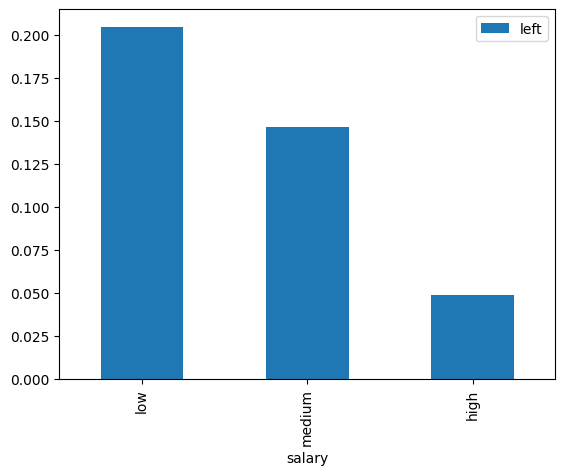

In [ ]:
# Churn ratio of employee by Department
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar')
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).round(3).T*100

Department,hr,accounting,technical,support,sales,marketing,IT,product_mng,RandD,management
left,18.8,17.6,17.4,17.1,17.0,16.6,16.2,16.0,12.2,11.9


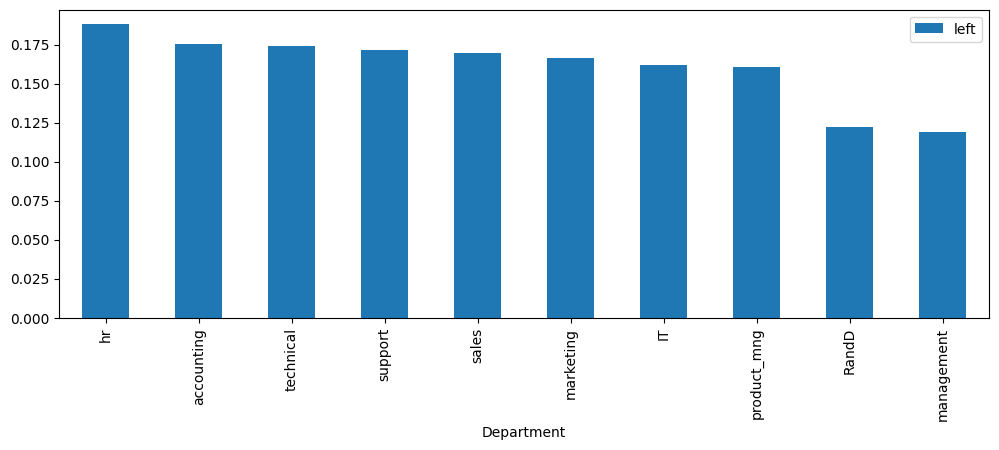

In [ ]:
# Taux de demissionement par département
pd.DataFrame(df.groupby('Department')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar',figsize=(12,4))
pd.DataFrame(df.groupby('Department')['left'].mean()).sort_values('left',ascending=False).round(3).T*100

* Rh: 'Ressource humaine'
* RandD: 'Research et Developpement'

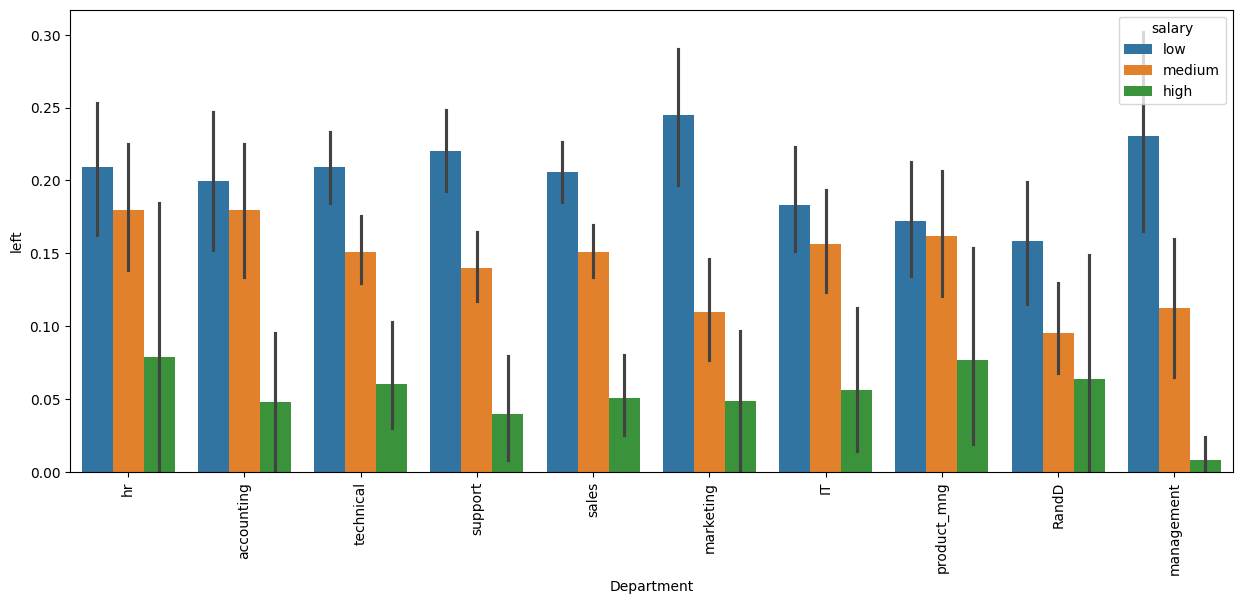

In [ ]:
plt.figure(figsize=(15,6))
result = df.groupby(["Department"])['left'].aggregate(np.mean).reset_index().sort_values('left',ascending=False)
sns.barplot(x='Department', y="left", data=df, hue='salary',order=result['Department'])
plt.xticks(rotation=90)
plt.show()

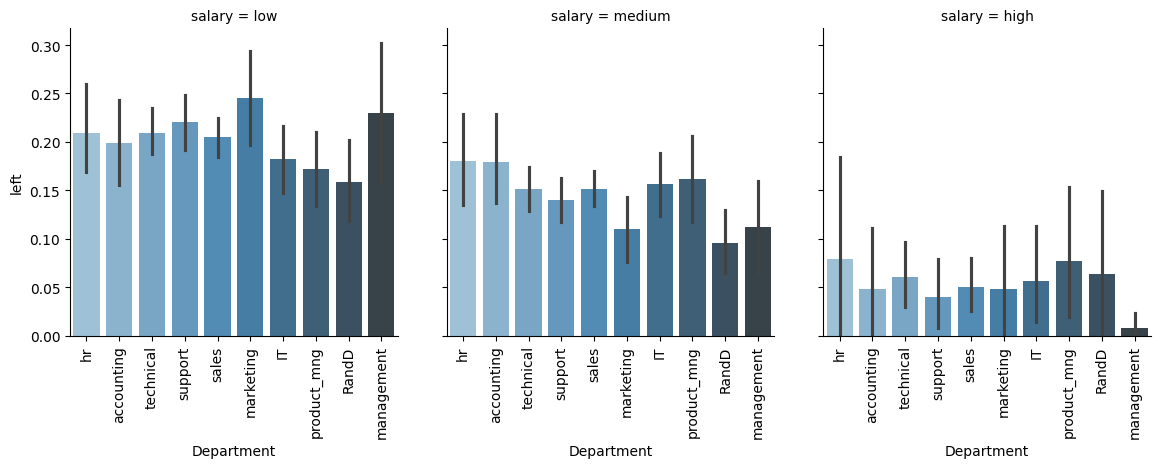

In [ ]:
g = sns.FacetGrid(df,col='salary',height=4)
ax = g.map(sns.barplot, "Department", "left", palette = "Blues_d", order=result['Department'])
ax.set_xticklabels(rotation = 90);

On constate que la principale motivation affectant le taux de rotation est le segment des salaires.
L’effet de cette motivation peut varier selon le département. Alors que la baisse du taux de rotation du personnel dans les RH, la comptabilité et la RanD a été plus régulière, la baisse a été plus marquée dans le domaine de la gestion.

### Employés restants
Vérifions le nombre d'employés restants. Vous pouvez tracer un graphique à barres avec Matplotlib. Ce graphique est idéal pour afficher le nombre de variables discrètes.

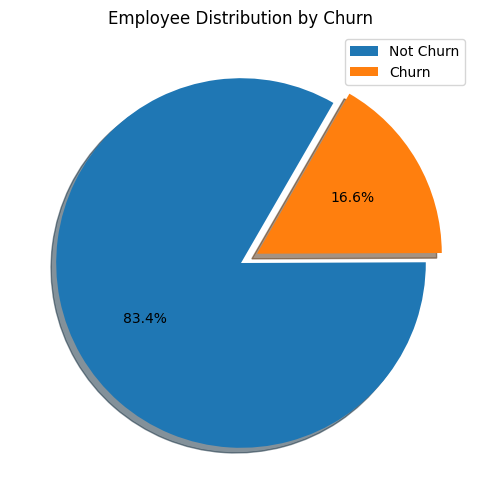

In [ ]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['left'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=60)
plt.legend(labels=['Not Churn','Churn'])
plt.title('Employee Distribution by Churn')
plt.axis('off')
plt.show()

### Nombre de projets

De même, vous pouvez également tracer un graphique à barres pour comptabiliser le nombre d'employés déployés sur combien de projets ?

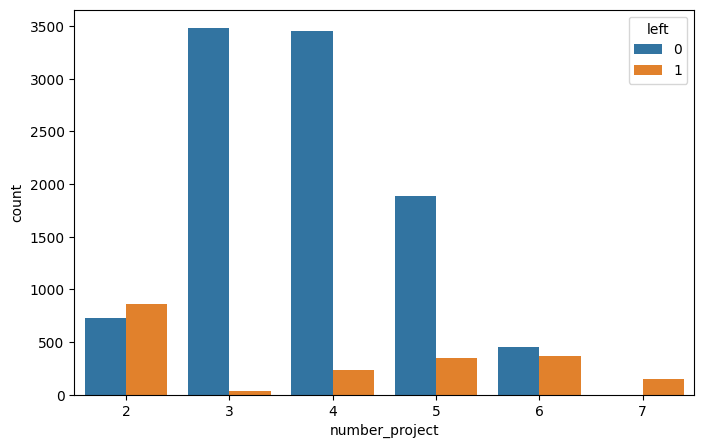

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='number_project', data=df, hue='left');

* La valeur optimale pour le nombre de projets sur lesquels travaille un employé est de 3. Augmenter ou diminuer ce nombre augmente le taux de désabonnement.

**satisfaction_level**

Department,support,marketing,IT,management,sales,product_mng,technical,RandD,hr,accounting
satisfaction_level,63.5,63.5,63.4,63.2,63.1,63.0,62.8,62.7,62.2,60.8


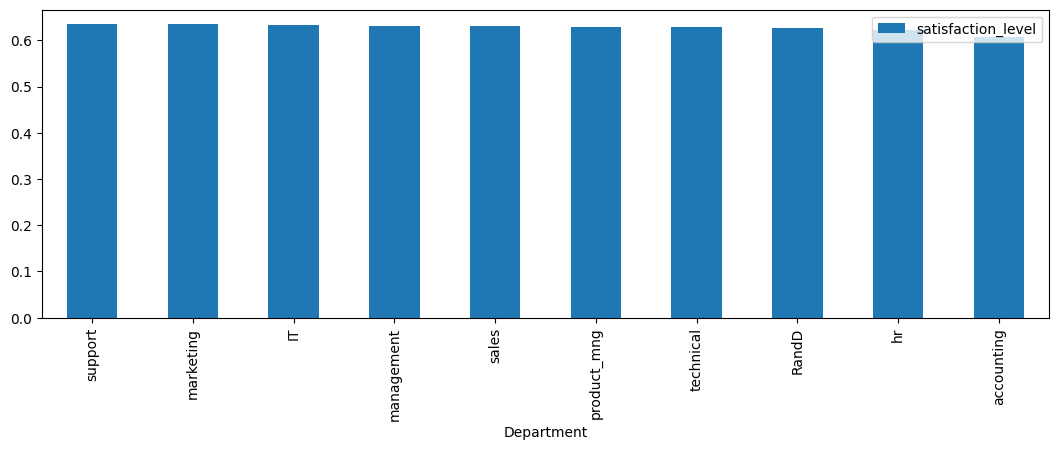

In [ ]:
pd.DataFrame(df.groupby('Department').satisfaction_level.mean()).sort_values('satisfaction_level',ascending=False).plot(kind='bar',figsize=(13,4))
pd.DataFrame(df.groupby('Department').satisfaction_level.mean()).sort_values('satisfaction_level',ascending=False).T.round(3)*100

## 3. Data Pre-Processing

#### Label Encoding

De nombreux algorithmes de machine learning nécessitent des données d'entrée numériques. Il est donc nécessaire de représenter les colonnes catégorielles dans une colonne numérique. Pour encoder ces données, vous pouvez associer chaque valeur à un nombre. Par exemple, la valeur de la colonne Salaire peut être représentée comme suit : faible : 0, moyen : 1 et élevé : 2.

In [ ]:
df[['Department','salary']].sample(5)

,Department,salary
8421,sales,medium
7982,support,low
2546,accounting,low
5327,IT,medium
2972,RandD,low


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Department']=LabelEncoder().fit_transform(df[['Department']])
df['salary']=LabelEncoder().fit_transform(df[['salary']])

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df),
                         columns=df.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,2.241116,-0.131228,0.389405,-0.567131
1,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,2.241116,-0.131228,0.389405,1.025111
2,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,2.241116,-0.131228,0.389405,1.025111
3,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,2.241116,-0.131228,0.389405,-0.567131
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,2.241116,-0.131228,0.389405,-0.567131


## 5. Model Building

### Split Data as Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
X=df.drop('left',axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) # stratify=y

In [ ]:
y_train.value_counts()

,count
left,
0,7005
1,1388


#### SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
y_smote.value_counts()

,count
left,
0,7005
1,7005


#### ADASYN

In [ ]:
ad = ADASYN(random_state=42)
X_adasyn, y_adasyn = ad.fit_resample(X_train, y_train)
y_adasyn.value_counts()

,count
left,
1,7070
0,7005


In [ ]:
# SMOTE
# X_train, y_train = X_smote, y_smote

# ADASYN
X_train, y_train = X_adasyn, y_adasyn

# `1.Gradient Boosting Classifier`

#### Model Building

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report,confusion_matrix,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

In [ ]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbc.predict(X_test)

#### Evaluating Model Performance

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2797  198]
[ 36 567]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2995
           1       0.74      0.94      0.83       603

    accuracy                           0.93      3598
   macro avg       0.86      0.94      0.89      3598
weighted avg       0.95      0.93      0.94      3598



In [ ]:
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='weighted')
gbc_recall = recall_score(y_test, y_pred, average='weighted')
print('gbc_accuracy:',gbc_accuracy,
      '\ngbc_f1_score:',gbc_f1_score,
      '\ngbc_recall:',gbc_recall)

gbc_accuracy: 0.9349638688160089 
gbc_f1_score: 0.9379107928146333 
gbc_recall: 0.9349638688160089


#### Tunning

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc_params = {"n_estimators": [50,100,300],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
#gbc_grid= GridSearchCV(gbc, gbc_params, cv = 5,
#                           n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
gbc_grid= RandomizedSearchCV(gbc, gbc_params, cv = 5,
                              n_iter=10,
                           n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
gbc_grid.best_params_

In [ ]:
gbc_tuned = GradientBoostingClassifier(learning_rate= 0.1,
                         max_depth= 9,
                         n_estimators= 300,
                         subsample= 0.5).fit(X_train, y_train)

y_pred = gbc_tuned.predict(X_test)

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2953   42]
[ 53 550]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2995
           1       0.93      0.91      0.92       603

    accuracy                           0.97      3598
   macro avg       0.96      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598



In [ ]:
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='weighted')
gbc_recall = recall_score(y_test, y_pred, average='weighted')
print('gbc_accuracy:',gbc_accuracy,
      '\ngbc_f1_score:',gbc_f1_score,
      '\ngbc_recall:',gbc_recall)

In [ ]:
gbc_f1_true=float(classification_report(y_test, y_pred).split()[12])
gbc_f1_true

# ``3.Random Forest Classifier``

#### Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#### Evaluating Model Performance

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

In [ ]:
rf_f1_true=float(classification_report(y_test, y_pred).split()[12])
rf_f1_true

#### Tunning

In [ ]:
# rfc_params = {"n_estimators":[100,300,500],
#               "max_depth":[7,10,15],
#               "max_features": [8,10,15],
#               "min_samples_split": [4,6,8]}

In [ ]:
# rfc_grid = GridSearchCV(rf_model, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# rfc_grid= RandomizedSearchCV(rf_model, rfc_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [ ]:
# rfc_grid.best_params_

In [ ]:
rfc_tuned = RandomForestClassifier(max_depth = 20,
                                   max_features = 7,
                                   min_samples_split = 2,
                                   n_estimators = 130).fit(X_train, y_train)

In [ ]:
y_pred = rfc_tuned.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

# ``4.XGBoost Classifer``

In [ ]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train , y_train)
y_pred = xgb.predict(X_test)

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

#### Tunning

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_params = {"n_estimators": [50,500,1000],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5,
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [ ]:
# xgb_grid.best_params_

In [ ]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 9,
                                n_estimators= 500,
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

In [ ]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 11,
                                n_estimators= 600,
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

In [ ]:
xgb_f1_true=float(classification_report(y_test, y_pred).split()[12])
xgb_f1_true

# ``2.KNeighborsClassifer``

In [ ]:
X=df_scaled.drop('left',axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) # stratify=y

#### Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
neighbors = range(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### **Find Optimum K Value with Elbow Method**

In [ ]:
error_rate = []

for i in range(1,10):

    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),
         error_rate,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

#### Tunning

In [ ]:
# knn = KNeighborsClassifier()
# knn_params = {"n_neighbors": range(1,10,2)}

# knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [ ]:
# knn_cv_model.best_params_

In [ ]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

#### Evaluating Model Performance

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

In [ ]:
knn_f1_true=float(classification_report(y_test, y_pred).split()[12])
knn_f1_true

### `Compare Models Accuracies & F1 Scores & Recall`

In [ ]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Gradient Boosting","K-Nearest Neighbor"],
                        "Accuracy": [rfc_accuracy, xgb_accuracy, gbc_accuracy,knn_accuracy],
                        "F1 Score": [rfc_f1_score, xgb_f1_score, gbc_f1_score, knn_f1_score],
                        "Recall": [rfc_recall, xgb_recall, gbc_recall,knn_recall],
                        "F1 Score (True)": [rf_f1_true, xgb_f1_true, gbc_f1_true, knn_f1_true]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment

plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Recall (Weighted)')
plt.show()

plt.subplot(413)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('F1 Score (Weighted)')
plt.show()

plt.subplot(414)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score (True)", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Feature Importance for XGBoost

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

### Feature Importance for Random Forest

In [ ]:
feature_imp = pd.Series(rf_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

### Save and Export the Model as .pkl

In [ ]:
import pickle


pickle.dump(xgb_tuned,open("XGBoost.pkl","wb"))
pickle.dump(rf_model,open("RandomForest.pkl","wb"))
pickle.dump(gbc_tuned,open("GradientBoostC.pkl","wb"))

### Save and Export Variables as .pkl

In [ ]:
xgb_model = pickle.load(open("XGBoost.pkl","rb"))
rf_model = pickle.load(open("RandomForest.pkl","rb"))

In [ ]:
department_encode={'sales':7,
                     'technical':9,
                     'support':8,
                     'IT':0,
                     'product_mng':6,
                     'marketing':5,
                     'RandD':1,
                     'accounting':2,
                     'hr':3,
                     'management':4}

salary_encode = {'low':1,
                 'medium':2,
                 'high':3}

In [ ]:
# my_dict = {'satisfaction_level':0.38,
#            'last_evaluation':0.53,
#            'number_project':2,
#            'average_montly_hours':157,
#            'time_spend_company':3,
#            'Work_accident':0,
# #            'left':1
#            'promotion_last_5years':0,
#            'Department':'sales',
#            'salary':'low',
#             }

In [ ]:
my_dict = {'satisfaction_level':0.05,
           'last_evaluation':0.44,
           'number_project':3,
           'average_montly_hours':199,
           'time_spend_company':2,
           'Work_accident':0,
#            'left':0
           'promotion_last_5years':0,
           'Department':'management',
           'salary':'low',
            }

In [ ]:
X = pd.DataFrame.from_dict([my_dict])
X[['salary','Department']]=pd.concat([X.salary.map(salary_encode),X.Department.map(department_encode)],axis=1)

In [ ]:
prediction_XGB = xgb_model.predict(X)
prediction_XGB

In [ ]:
print("The Churn : ",'Yes' if prediction_XGB[0] else 'No')

In [ ]:
prob_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Customer Churn is %{round(prob_XGB[0][1]*100,3)}')

In [ ]:
!pip install skl2onnx

In [ ]:
!pip install --upgrade onnx==1.14.1
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
initial_type = [('float_input', FloatTensorType([None, 2]))]
onx = convert_sklearn(, initial_types=initial_type)
with open("model.onnx", "wb") as f:
    f.write(onx.SerializeToString())